In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
%matplotlib inline


/Users/shivanikohli/Documents/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# df = pd.read_excel("combinedData.xlsx")
df = pd.read_csv('rawData.csv')

In [3]:
df.head()

,Location,KillCount,Position,Mode
0,D4,0,30,SOLO
1,C7,1,60,SOLO
2,D7,0,14,SOLO
3,G6,1,17,SOLO
4,D6,0,43,DUO


In [4]:
df.isnull().any()

Location     False
KillCount    False
Position     False
Mode         False
dtype: bool

In [5]:
df.Mode.replace(to_replace=dict(SOLO=0, DUO=1, SQUAD=2, Solo=0, Duo =1, Squad = 2), inplace=True)

In [6]:
df=df.drop([20])

In [7]:
df

,Location,KillCount,Position,Mode
0,D4,0,30,0
1,C7,1,60,0
2,D7,0,14,0
3,G6,1,17,0
4,D6,0,43,1
5,G6,0,28,1
6,G8,1,35,1
7,F5,0,50,1
8,H6,1,47,1
9,A5,0,49,1


/Users/shivanikohli/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


(-1, 10)

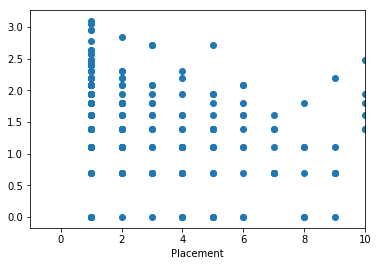

In [8]:
import seaborn as sns

plt.scatter((df.iloc[:,2]),np.log(df.iloc[:,1]))
# plt.ylabel()
plt.xlabel("Placement")
plt.xlim(-1,10)



Text(0.5,0,'Placement')

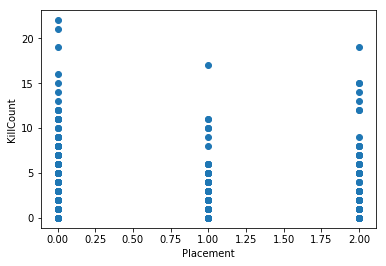

In [9]:
plt.scatter(df["Mode"], df["KillCount"])
plt.ylabel("KillCount")
plt.xlabel("Placement")

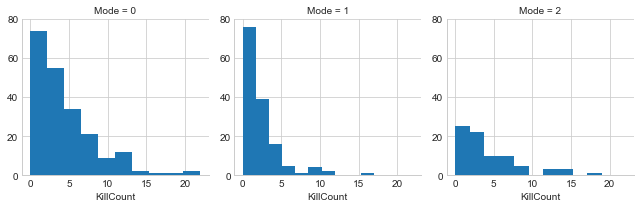

In [10]:
sns.set_style("whitegrid")
multiples = sns.FacetGrid(df, col = "Mode")
multiples = multiples.map(plt.hist, "KillCount")

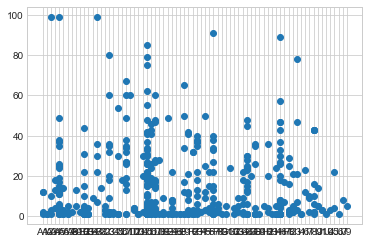

In [11]:
plt.scatter( df["Location"],df["Position"])

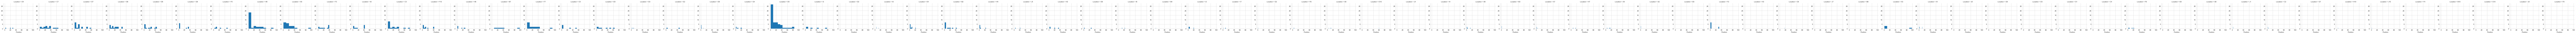

In [12]:
multiples = sns.FacetGrid(df, col = "Location")
multiples = multiples.map(plt.hist, "Position")

In [13]:
import statsmodels.api as sm

Y = df["Position"]
X = df[["KillCount", "Mode"]]

model = sm.OLS(Y,X.astype(float)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Position   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     51.68
Date:                Fri, 20 Apr 2018   Prob (F-statistic):           7.52e-21
Time:                        18:03:04   Log-Likelihood:                -1956.6
No. Observations:                 434   AIC:                             3917.
Df Residuals:                     432   BIC:                             3925.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KillCount     -0.0840      0.223     -0.377      0.7

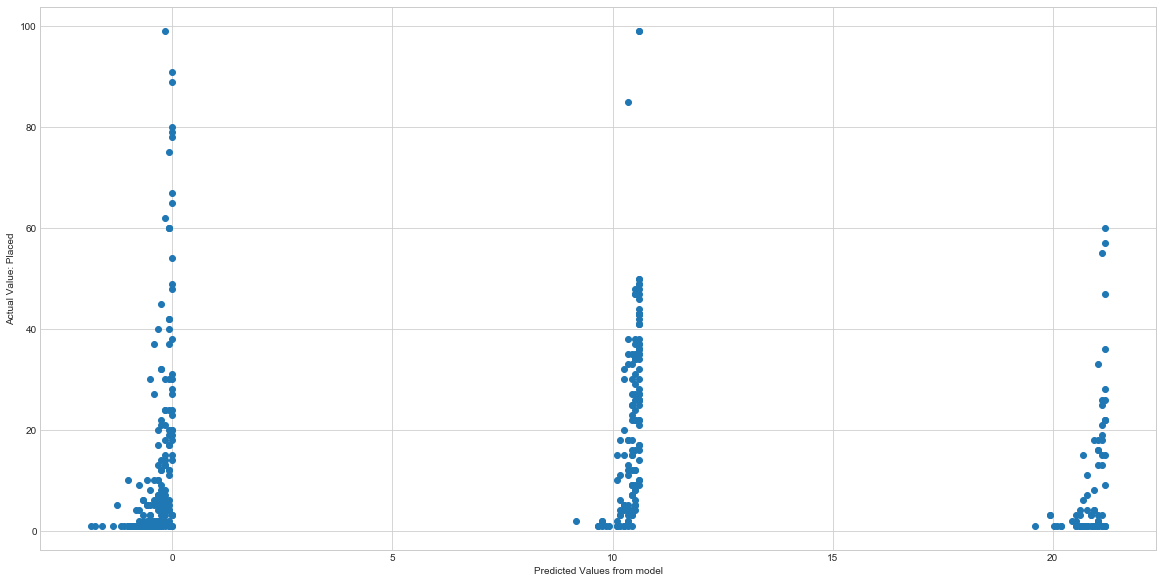

In [14]:
predictions = model.predict(X)
plt.figure(figsize = (20,10))
plt.scatter(predictions, Y)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Value: Placed")
plt.show()

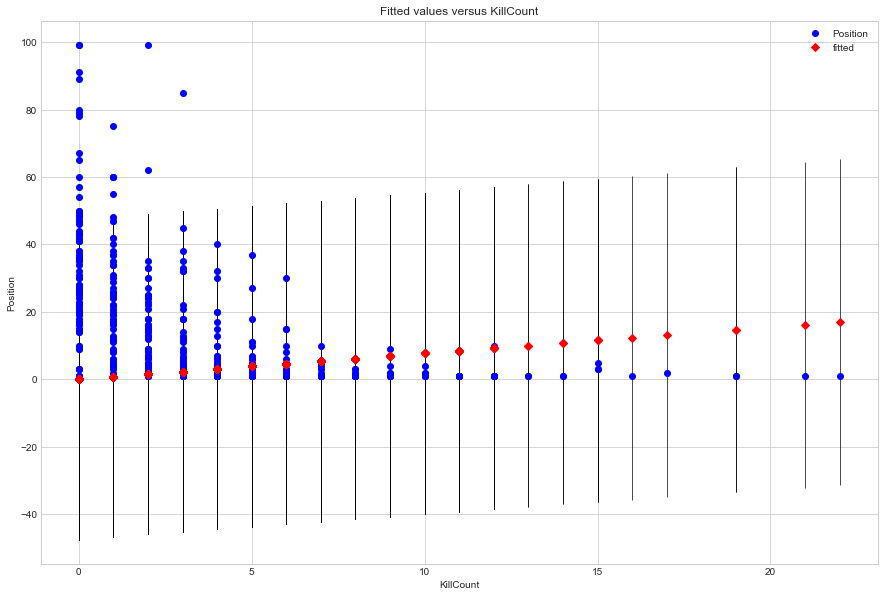

In [15]:
X = df["KillCount"]
Y = df["Position"]

m1 = sm.OLS(Y,X).fit()

fig, ax = plt.subplots(figsize=(15,10))
fig = sm.graphics.plot_fit(m1, 0, ax=ax)


In [16]:
import sklearn.cross_validation
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,Y, test_size = 0.2, random_state = 5) 

/Users/shivanikohli/Documents/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [62]:
from sklearn.linear_model import LinearRegression

In [19]:
f1 = df['KillCount'].values
f2 = df['Mode'].values
X = np.array(list(zip(f1, f2)))

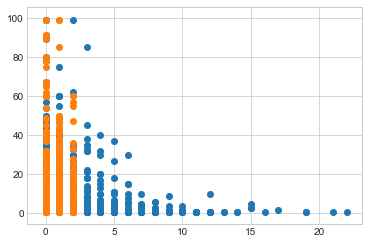

In [27]:
year = df["Position"]
plt.scatter(df['KillCount'],year)
plt.scatter(df['Mode'],year)
plt.figure(figsize=(12,10))
plt.show()

In [20]:
 from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [28]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1])

NameError: name 'Axes3D' is not defined

In [ ]:
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c=labels)
